# Specialist Certificate in Data Analytics Essentials Project

## Chapter 1: Introduction

The aim of this project is to segment PGA Tour golfers into clusters using their strokes gained data from the 2021/2022 PGA Tour season to date. Strokes gained measures how the player is performing versus the field across four different aspects of the game. The second aim of this project is to generate insights into these clusters using the PGA Tour’s FedEx Cup rankings.

## Chapter 2: Importing Data

### Web Scraping

In [1]:
from bs4 import BeautifulSoup
import requests
url = "https://www.pgatour.com/fedexcup/official-standings.html"
result = requests.get(url)

In [2]:
soup= BeautifulSoup(result.text, "html.parser")
#print(soup.prettify())

In [3]:
table_element = soup.find("table", class_="table-styled table-fedexcup-standings")
#print(table_element)

In [4]:
table_rows = []

for row in table_element.find_all("tr"):
    details= row.find_all("td")
    table_rows.append(details)

table_rows = list(filter(None, table_rows))
table_rows = [item for item in table_rows if len(item)==9]

In [5]:
fedex_ranking = []
player_name = []
events_played = []
fedex_points = []
num_wins = []
num_top_10s = []

for row in table_rows:
    fedex_ranking.append(row[0])
    player_name.append(row[2])
    events_played.append(row[3])
    fedex_points.append(row[4])
    num_wins.append(row[5])
    num_top_10s.append(row[6])
                

In [6]:
import re

player_name = [re.sub(r'<.*?>','', str(name)) for name in player_name]
player_name = [player.replace('\xa0',' ') for player in player_name]

In [7]:
def remove_tags(lists):
    """remove HTML tags and convert to integer"""
    lists = [re.sub(r'<.*?>','', str(element)) for element in lists]
    lists = [element.replace(',','') for element in lists]
    lists = [element.replace('--','0') for element in lists]
    lists = [int(element) for element in lists]
    return lists


fedex_ranking = remove_tags(fedex_ranking)
events_played = remove_tags(events_played)
fedex_points = remove_tags(fedex_points)
num_wins = remove_tags(num_wins)
num_top_10s = remove_tags(num_top_10s)

In [8]:
import pandas as pd 
pd.DataFrame({'Player Name': player_name,'Fedex Ranking': fedex_ranking,'Events Played':events_played,
             'Fedex Points': fedex_points, 'Number of Wins': num_wins, 
              'Number of Top 10s' : num_top_10s}).to_csv('fedex_cup_rankings.csv')

### Importing Data from a CSV File into a Pandas DataFrame

In [9]:
fedex_cup = pd.read_csv (r'Documents\UCD Project\fedex_cup_rankings_230522.csv')
print(fedex_cup.head())
strokes_gained = pd.read_csv (r'Documents\UCD Project\strokes_gained_data_230522.csv')
print(strokes_gained.head())

   Unnamed: 0        Player Name  Fedex Ranking  Events Played  Fedex Points  \
0           0  Scottie Scheffler              1             16          2842   
1           1      Cameron Smith              2             11          1603   
2           2          Sam Burns              3             15          1601   
3           3      Justin Thomas              4             13          1568   
4           4   Hideki Matsuyama              5             14          1544   

   Number of Wins  Number of Top 10s  
0               4                  7  
1               2                  5  
2               2                  6  
3               1                  8  
4               2                  5  
          player_name  events_played  wins  x_wins  x_wins_majors  \
0      Thomas, Justin             14     1   0.345          0.090   
1      Smith, Cameron             12     2   1.757          0.069   
2       McIlroy, Rory             11     1   0.247          0.269   
3  Scheff

## Chapter 3: Merging Data

In [10]:
strokes_gained['first_name'] = strokes_gained['player_name'].str.rsplit(',').str[-1].str.strip()
strokes_gained['surname'] = strokes_gained['player_name'].str.extract('(.+?),')
strokes_gained['player_name'] = strokes_gained['first_name'] + " " + strokes_gained['surname']
strokes_gained.drop(["first_name", "surname"], axis = 1, inplace = True)

In [11]:
strokes_gained.head()

,player_name,events_played,wins,x_wins,x_wins_majors,rounds_played,shotlink_played,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
0,Justin Thomas,14,1,0.345,0.090,55,43,0.322515,0.395559,0.915848,0.373701,1.685109,1.871881
1,Cameron Smith,12,2,1.757,0.069,42,35,0.715735,0.268823,1.217806,-0.120312,1.366317,2.012048
2,Rory McIlroy,11,1,0.247,0.269,42,38,0.329505,0.618240,0.408667,0.932341,1.959247,1.973157
3,Scottie Scheffler,17,4,0.866,0.793,65,44,0.458728,0.396876,0.695335,0.179576,1.271787,1.057540
4,Jon Rahm,12,1,1.023,0.000,46,39,0.043139,-0.193457,0.493248,1.280379,1.580171,1.349366


In [12]:
df = fedex_cup.merge(strokes_gained, left_on='Player Name', right_on='player_name', how = 'inner')
df.drop(['Unnamed: 0','player_name','events_played','wins','x_wins_majors','rounds_played','shotlink_played'], 
             axis=1, inplace=True)

In [13]:
df

,Player Name,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
0,Scottie Scheffler,1,16,2842,4,7,0.866,0.458728,0.396876,0.695335,0.179576,1.271787,1.057540
1,Cameron Smith,2,11,1603,2,5,1.757,0.715735,0.268823,1.217806,-0.120312,1.366317,2.012048
2,Sam Burns,3,15,1601,2,6,0.430,0.442580,0.092828,0.631290,0.210649,0.934767,1.269893
3,Justin Thomas,4,13,1568,1,8,0.345,0.322515,0.395559,0.915848,0.373701,1.685109,1.871881
4,Hideki Matsuyama,5,14,1544,2,5,1.208,-0.184929,0.257662,0.743802,0.278980,1.280443,1.338770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,D.J. Trahan,238,6,11,0,0,0.000,-1.499503,0.302569,0.732476,-0.053070,0.981974,-0.241255
223,Bo Hoag,241,10,6,0,0,0.000,-0.403142,-0.354863,-1.158659,-0.164619,-1.678142,-0.337486
224,Davis Love III,243,5,3,0,0,0.000,-0.388319,-0.304571,-1.071721,0.022630,-1.353662,-1.241088
225,Ben Crane,244,5,3,0,0,0.000,0.265817,-0.104388,-0.891400,0.086690,-0.909097,-1.848540


## Chapter 4: Preliminary Analysis

In [14]:
df.isnull().sum()

Player Name          0
Fedex Ranking        0
Events Played        0
Fedex Points         0
Number of Wins       0
Number of Top 10s    0
x_wins               0
putt_raw             0
arg_raw              0
app_raw              0
ott_raw              0
t2g_raw              0
total_raw            0
dtype: int64

In [15]:
df.describe()

,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,118.656388,15.268722,379.264317,0.136564,1.519824,0.105410,0.002110,0.011700,-0.011463,-0.018911,-0.018674,0.121876
std,68.475795,4.459557,382.189513,0.454897,1.600139,0.256136,0.397169,0.292853,0.503523,0.405969,0.812016,0.723542
min,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,-1.973688,-1.006540,-2.193195,-1.605798,-3.450991,-3.813691
25%,60.500000,13.000000,118.000000,0.000000,0.000000,0.000000,-0.252374,-0.190562,-0.238243,-0.249404,-0.572104,-0.284957
50%,118.000000,16.000000,281.000000,0.000000,1.000000,0.008000,0.021594,0.038613,0.004549,-0.026987,-0.016401,0.096942
75%,176.500000,19.000000,481.000000,0.000000,2.000000,0.048500,0.262132,0.207688,0.332509,0.253095,0.507901,0.552440
max,252.000000,24.000000,2842.000000,4.000000,8.000000,1.757000,1.067602,0.908702,1.217806,1.280379,1.959247,2.012048


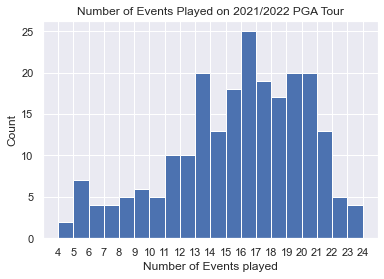

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
event_bins = np.arange(4,25)
sns.set()
_ = plt.hist(df['Events Played'],bins=event_bins)
_ = plt.xlabel('Number of Events played')
_ = plt.ylabel('Count')
_ = plt.xticks(event_bins)
_ = plt.title('Number of Events Played on 2021/2022 PGA Tour')
plt.show()

In [17]:
df = df.loc[df['Events Played'] > 9] 
df.describe()


,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,108.226131,16.467337,414.783920,0.145729,1.673367,0.116281,0.021981,0.012686,0.038722,0.007799,0.059207,0.177053
std,63.332888,3.256336,386.092937,0.475532,1.607697,0.270163,0.352962,0.267890,0.423779,0.379518,0.728991,0.633004
min,1.000000,10.000000,6.000000,0.000000,0.000000,0.000000,-1.136636,-0.662825,-1.504132,-1.214073,-1.913135,-2.149036
25%,54.500000,14.000000,167.000000,0.000000,0.000000,0.001000,-0.218634,-0.186856,-0.199526,-0.245304,-0.402945,-0.251199
50%,107.000000,16.000000,294.000000,0.000000,1.000000,0.011000,0.021594,0.038613,0.029580,0.002258,0.079585,0.111132
75%,160.500000,19.000000,530.500000,0.000000,2.000000,0.059000,0.262132,0.201228,0.328707,0.289814,0.540305,0.604889
max,241.000000,24.000000,2842.000000,4.000000,8.000000,1.757000,1.067602,0.655958,1.217806,1.280379,1.771407,2.012048


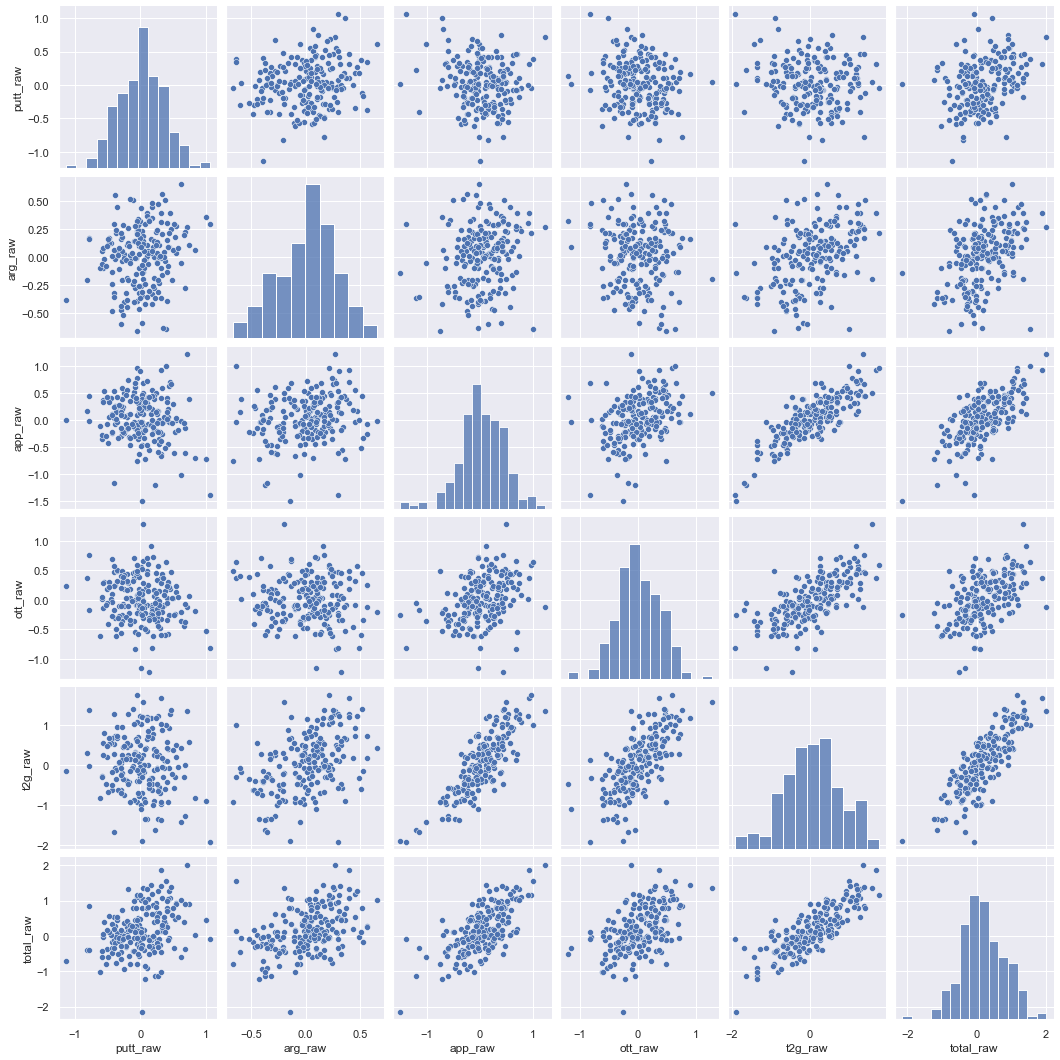

In [18]:
df_sg = df[['putt_raw','arg_raw','app_raw','ott_raw','t2g_raw','total_raw']]
sns.pairplot(df_sg)

## Chapter 5: Machine Learning

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore') #ignore warnings
features = df[['putt_raw','arg_raw','app_raw','ott_raw']].values
data_scaler = MinMaxScaler()
features_scaled = data_scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=['putt_raw','arg_raw','app_raw','ott_raw'])

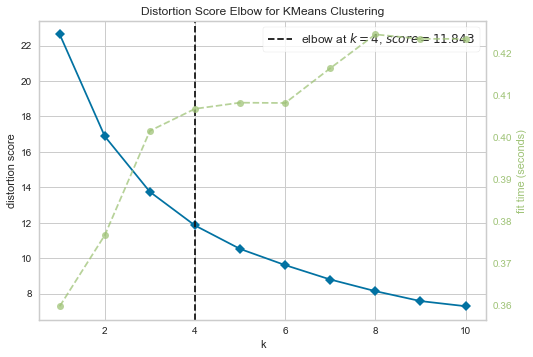

In [20]:
# Instantiate the clustering model and graph
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_scaled)

#Create the graph
visualizer.show();

In [21]:
kmeansmodel = KMeans(n_clusters= 4,random_state=1)
y_kmeans= kmeansmodel.fit_predict(features_scaled)
kmeansmodel.inertia_

11.842982177578264

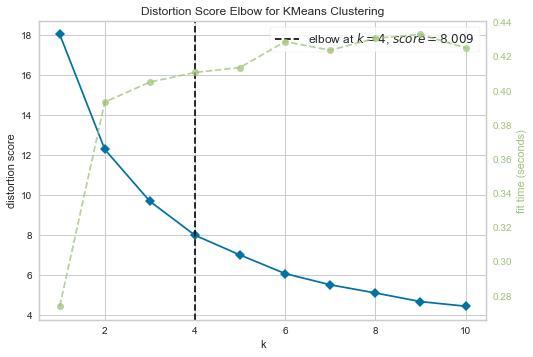

In [22]:
features_no_ott = df[['putt_raw','arg_raw','app_raw']].values
features_no_ott_scaled = data_scaler.fit_transform(features_no_ott)
features_no_ott_scaled = pd.DataFrame(features_no_ott_scaled, columns=['putt_raw','arg_raw','app_raw'])

# Instantiate the clustering model and graph
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_no_ott_scaled)

#Create the graph
visualizer.show();

In [23]:
kmeansmodel_no_ott = KMeans(n_clusters= 4,random_state=1)
y_kmeans_no_ott= kmeansmodel_no_ott.fit_predict(features_no_ott_scaled)
kmeansmodel_no_ott.inertia_

8.008607428921108

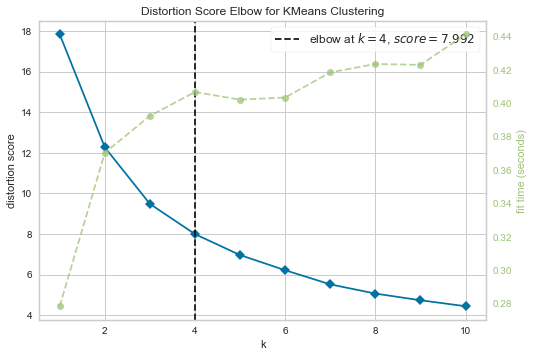

In [24]:
features_no_app = df[['putt_raw','arg_raw','ott_raw']].values
features_no_app_scaled = data_scaler.fit_transform(features_no_app)
features_no_app_scaled = pd.DataFrame(features_no_app_scaled, columns=['putt_raw','arg_raw','ott_raw'])

# Instantiate the clustering model and graph
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_no_app_scaled)

#Create the graph
visualizer.show();

In [25]:
kmeansmodel_no_app = KMeans(n_clusters= 4,random_state=1)
y_kmeans_no_app= kmeansmodel_no_app.fit_predict(features_no_app_scaled)
kmeansmodel_no_app.inertia_

7.991979965936969

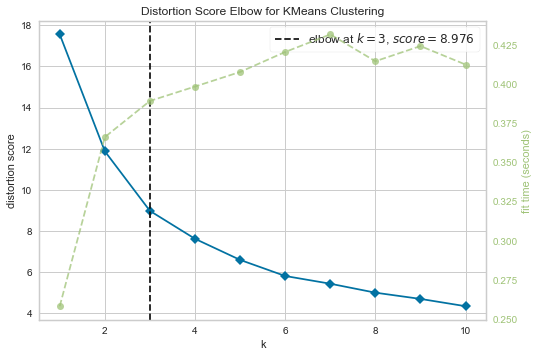

In [26]:
features_no_putt = df[['arg_raw','app_raw','ott_raw']].values
features_no_putt_scaled = data_scaler.fit_transform(features_no_putt)
features_no_putt_scaled = pd.DataFrame(features_no_putt_scaled, columns=['arg_raw','app_raw','ott_raw'])

# Instantiate the clustering model and graph
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_no_putt_scaled)

#Create the graph
visualizer.show();

In [27]:
kmeansmodel_no_putt = KMeans(n_clusters= 3,random_state=1)
y_kmeans_no_putt= kmeansmodel_no_putt.fit_predict(features_no_putt_scaled)
kmeansmodel_no_putt.inertia_

8.976294596675682

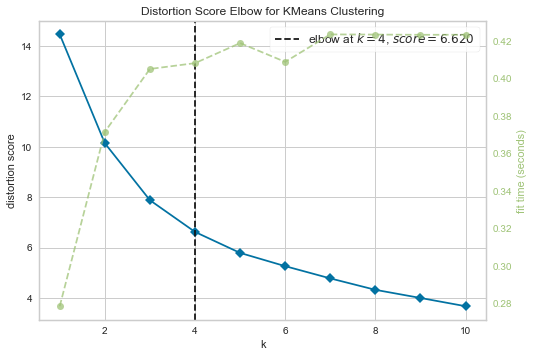

In [28]:
features_no_arg = df[['putt_raw','app_raw','ott_raw']].values
features_no_arg_scaled = data_scaler.fit_transform(features_no_arg)
features_no_arg_scaled = pd.DataFrame(features_no_arg_scaled, columns=['putt_raw','app_raw','ott_raw'])

# Instantiate the clustering model and graph
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_no_arg_scaled)

#Create the graph
visualizer.show();

In [29]:
kmeansmodel_no_arg = KMeans(n_clusters= 4,random_state=1)
y_kmeans_no_arg= kmeansmodel_no_arg.fit_predict(features_no_arg_scaled)
kmeansmodel_no_arg.inertia_

6.619520349323648

In [30]:
y_kmeans_no_arg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 3, 0, 3, 0, 3,
       3, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 3, 0, 2, 3, 2, 0, 0,
       3, 0, 0, 0, 1, 1, 3, 0, 1, 3, 3, 1, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3,
       3, 2, 1, 1, 3, 2, 1, 2, 2, 3, 1, 3, 0, 3, 2, 1, 3, 1, 3, 1, 2, 3,
       3, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 3, 1, 1, 1, 3, 1, 2, 2, 3, 3,
       1, 0, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 3, 2, 2,
       3, 1, 1, 2, 1, 3, 3, 1, 2, 3, 2, 2, 3, 2, 3, 1, 3, 1, 1, 2, 1, 3,
       1, 3, 2, 1, 2, 2, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 2, 2,
       2])

## Chapter 6: Analysis and Insights:

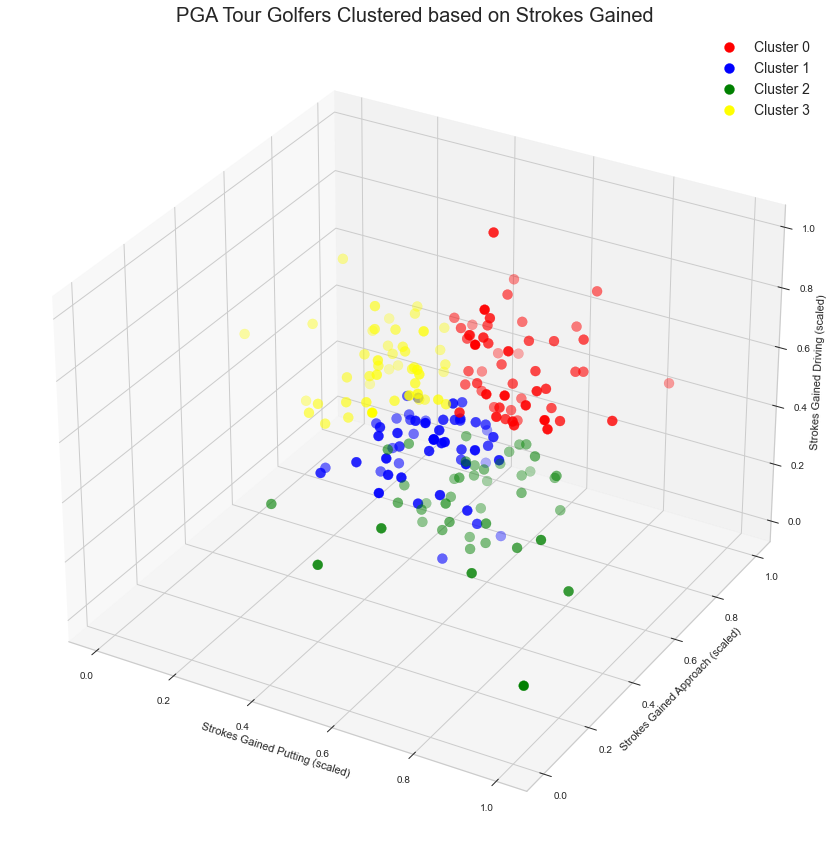

In [31]:
#Visualizing all the clusters 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_no_arg_scaled[y_kmeans_no_arg == 0]['putt_raw'], features_no_arg_scaled[y_kmeans_no_arg == 0]['app_raw'], 
            features_no_arg_scaled[y_kmeans_no_arg == 0]['ott_raw'],s = 100, c = 'red', label = 'Cluster 0') 
ax.scatter(features_no_arg_scaled[y_kmeans_no_arg == 1]['putt_raw'], features_no_arg_scaled[y_kmeans_no_arg == 1]['app_raw'], 
            features_no_arg_scaled[y_kmeans_no_arg == 1]['ott_raw'],s = 100, c = 'blue', label = 'Cluster 1') 
ax.scatter(features_no_arg_scaled[y_kmeans_no_arg == 2]['putt_raw'], features_no_arg_scaled[y_kmeans_no_arg == 2]['app_raw'], 
            features_no_arg_scaled[y_kmeans_no_arg == 2]['ott_raw'],s = 100, c = 'green', label = 'Cluster 2') 
ax.scatter(features_no_arg_scaled[y_kmeans_no_arg == 3]['putt_raw'], features_no_arg_scaled[y_kmeans_no_arg == 3]['app_raw'], 
            features_no_arg_scaled[y_kmeans_no_arg == 3]['ott_raw'],s = 100, c = 'yellow', label = 'Cluster 3') 
plt.title('PGA Tour Golfers Clustered based on Strokes Gained', fontsize=20 )
ax.set_xlabel('Strokes Gained Putting (scaled)')
ax.set_ylabel('Strokes Gained Approach (scaled)')
ax.set_zlabel('Strokes Gained Driving (scaled)')
ax.legend(prop={'size': 14})
plt.show()

In [32]:
df['Cluster']=y_kmeans_no_arg

In [33]:
df.head()

,Player Name,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw,Cluster
0,Scottie Scheffler,1,16,2842,4,7,0.866,0.458728,0.396876,0.695335,0.179576,1.271787,1.057540,0
1,Cameron Smith,2,11,1603,2,5,1.757,0.715735,0.268823,1.217806,-0.120312,1.366317,2.012048,0
2,Sam Burns,3,15,1601,2,6,0.430,0.442580,0.092828,0.631290,0.210649,0.934767,1.269893,0
3,Justin Thomas,4,13,1568,1,8,0.345,0.322515,0.395559,0.915848,0.373701,1.685109,1.871881,0
4,Hideki Matsuyama,5,14,1544,2,5,1.208,-0.184929,0.257662,0.743802,0.278980,1.280443,1.338770,0


In [34]:
df['Cluster'].value_counts()

0    55
1    53
3    48
2    43
Name: Cluster, dtype: int64

In [35]:
df.groupby('Cluster').mean()

,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
Cluster,,,,,,,,,,,,
0,41.054545,15.800000,818.381818,0.436364,3.327273,0.333073,0.206873,0.069662,0.402544,0.293914,0.766120,0.881022
1,146.113208,16.679245,209.094340,0.018868,0.830189,0.007189,-0.100169,0.011066,0.040640,-0.314212,-0.262507,-0.162204
2,130.651163,16.674419,282.069767,0.046512,1.139535,0.042628,0.352143,0.001079,-0.442112,-0.256294,-0.697327,-0.138459
3,123.270833,16.812500,298.333333,0.041667,1.187500,0.054312,-0.350771,-0.040413,0.050470,0.272097,0.282154,0.027664


In [36]:
df.groupby('Cluster').median()

,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
Cluster,,,,,,,,,,,,
0,35.0,16.0,749.0,0.0,3.0,0.1810,0.189759,0.105297,0.396944,0.256221,0.739271,0.900672
1,149.0,16.0,193.0,0.0,1.0,0.0020,-0.050747,0.032832,0.014641,-0.265512,-0.248468,-0.113882
2,139.0,17.0,221.0,0.0,1.0,0.0030,0.324278,-0.001686,-0.394798,-0.247412,-0.640894,-0.083994
3,119.0,17.5,279.0,0.0,1.0,0.0085,-0.351569,0.013872,0.044419,0.293368,0.271082,0.062116


In [37]:
df['Top 30']= np.where(df['Fedex Ranking'] <= 30, 1, 0)
df['Outside 125']= np.where(df['Fedex Ranking'] > 125, 1, 0)

In [46]:
df['Top 30'].sum()

27

In [45]:
df.groupby('Cluster')['Top 30'].sum()

Cluster
0    24
1     0
2     1
3     2
Name: Top 30, dtype: int32

In [50]:
df.groupby('Cluster')['Top 30'].sum()/df['Cluster'].value_counts()

0    0.436364
1    0.000000
2    0.023256
3    0.041667
dtype: float64

In [39]:
df.groupby('Cluster')['Outside 125'].sum()

Cluster
0     1
1    36
2    24
3    23
Name: Outside 125, dtype: int32

In [51]:
df.groupby('Cluster')['Outside 125'].sum()/df['Cluster'].value_counts()

0    0.018182
1    0.679245
2    0.558140
3    0.479167
dtype: float64

[Text(0.5, 1.0, 'Boxplot of FedEx Ranking per Cluster')]

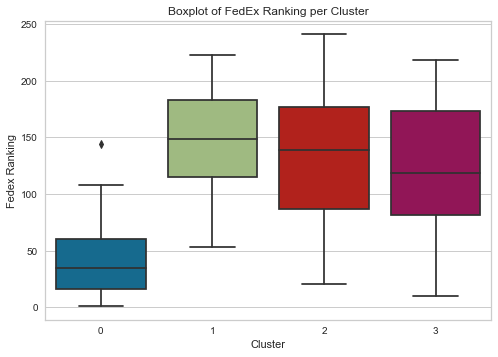

In [40]:
sns.boxplot(x='Cluster', y='Fedex Ranking', data=df).set(title='Boxplot of FedEx Ranking per Cluster')

In [41]:
df.groupby('Cluster')['Number of Wins'].sum()

Cluster
0    24
1     1
2     2
3     2
Name: Number of Wins, dtype: int64

In [42]:
df.groupby('Cluster')['Number of Top 10s'].sum()

Cluster
0    183
1     44
2     49
3     57
Name: Number of Top 10s, dtype: int64

In [49]:
df.loc[(df['Cluster'] == 0) & (df['Outside 125'] == 1)]

,Player Name,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw,Cluster,Top 30,Outside 125
137,Austin Smotherman,144,16,206,0,0,0.013,-0.202282,-0.447152,0.559026,0.437569,0.549443,0.033177,0,0,1
